In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from estimagic.optimization.utilities import index_element_to_string

In [10]:
res = pd.read_pickle("bld/indices/kw_indices.pickle")

## Interpretation Guidelines

- There are four kinds of indices:
    - mu_ind 
    - sigma_ind
    - mu_full
    - sigma_full
- Parameter is non-influential if all four are "very close to zero"
- If all but mu_full are zero, Parameter is indirectly influential
- If all but mu_ind are zero, Parameter has direct influence
- If one or both sigmas are >> 0, parameter has strong interactions

## Radial vs. Trajectory

- Trajectory has:
    - fixed stepsize
    - very un-even coverage, unless very smart designs are used
- Radial has:
    - Variable stepsize
    - Uniform coverage
    - No need to calculate optimal trajectories
- -> For very non-linear functions, radial seems better

## Random vs. Quasi-Random Sampling

- If I am not mistaken, we need 2 * n_params dimensional sequences
    - For KW94, halton and R-sequence could work, sobol is already difficult
    - For KW97 no sequence I know is suitable
- Tobias used a 1d sequence and reshaped
- I could not get a multi-dimensional sobol sequence to run because some step sizes are 0
- Uniform random numbers get closer to published papers than 1-d sobol
- -> need to experiment with burn-in periods and other sequences


## What should be in the denominator

- Paper uses deltas in uniform space
- Tobias suggests deltas in multivariate normal space
    - EE can be interpreted as derivatives with very finite step size
- Uniform deltas give more weight to effetcs at the bounds
- For our small SDs, effects would mostly be much larger with multivariate normal deltas
- For now uniform deltas, due to numeric zeros

## KW 94 Results

- 4000 Individuals per simulation
- QOI: Effect of 500 Dollar tuition subsidy on average schooling
- 300 draws, 27 parameters -> over 15 000 calls to simulate
    - not enough for convergence, but all I could do in one night
- Radial design with random sampling
    - Multivariate sobol with 2 * 27 dimensions is problematic
    - No sequence availabla that supports dimensionality we need in KW97
    - Tobias used 1d sobol and reshaped. Does that work?


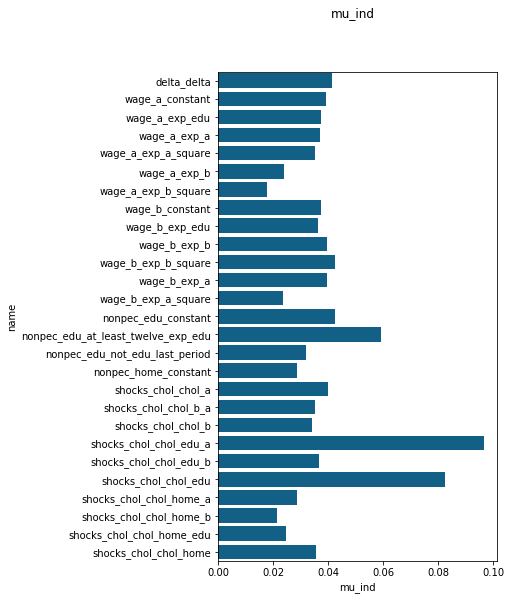

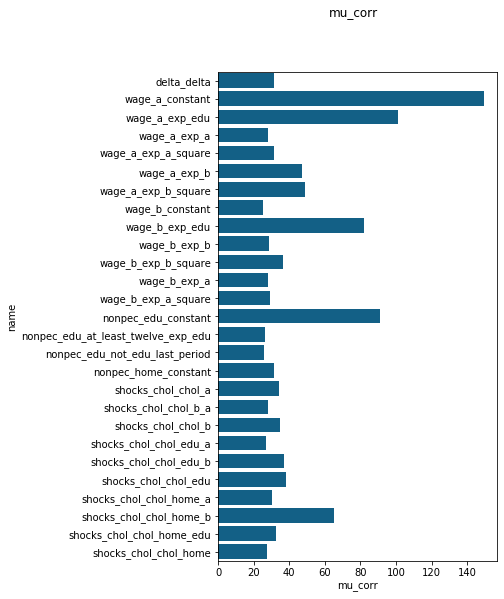

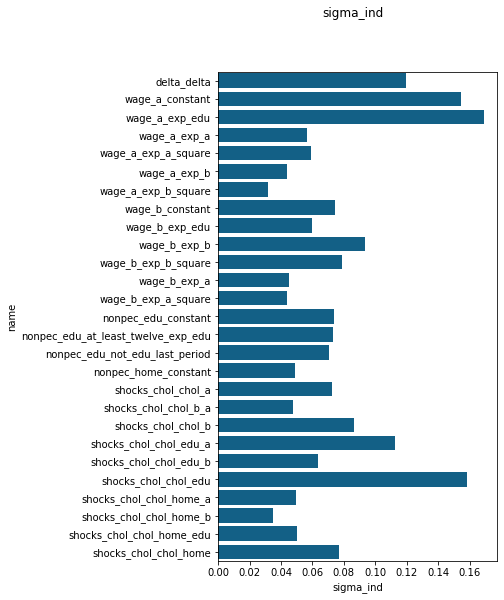

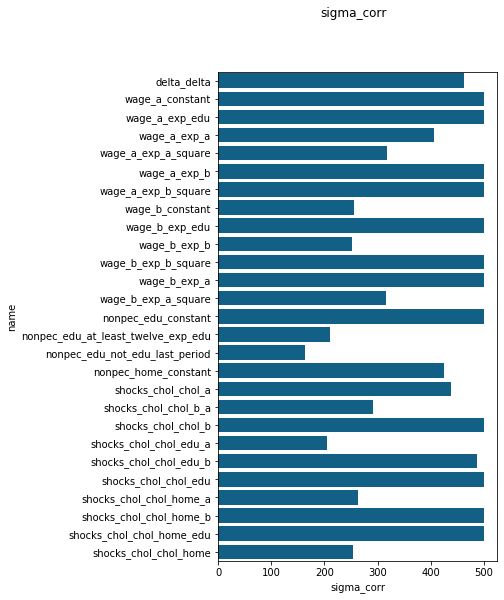

In [11]:
kinds = ["mu_ind", "mu_corr", "sigma_ind", "sigma_corr"]

for kind in kinds:
    fig, ax = plt.subplots(figsize=(5, 9))
    df = res[kind].copy().to_frame(name=kind)
    df[kind] = np.clip(df[kind], 0, 500)
    names = [index_element_to_string(tup) for tup in df.index]
    df["name"] = names

    sns.barplot(x=kind, y="name", data=df, orient="h", ax=ax, color="#006699")
    fig.suptitle(kind)
    plt.show()
    plt.close()

## Convergence

mu_ind_cum


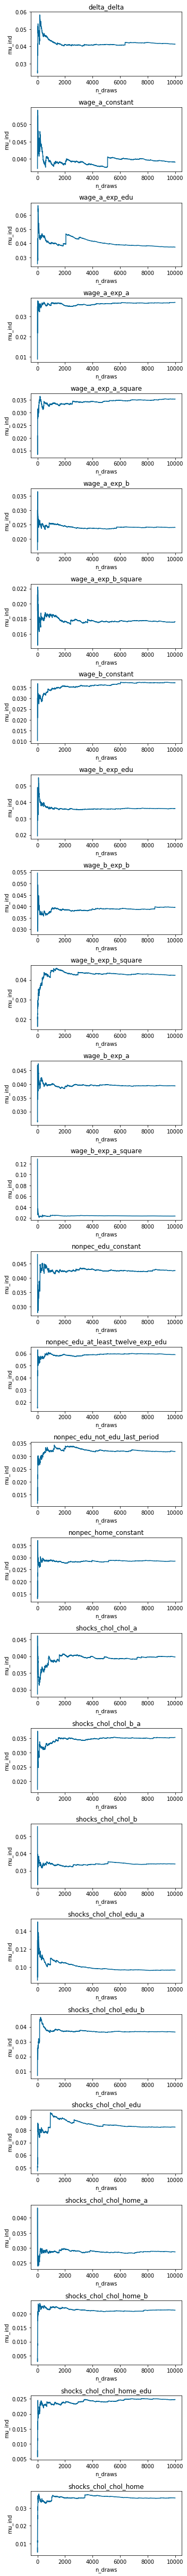

mu_corr_cum


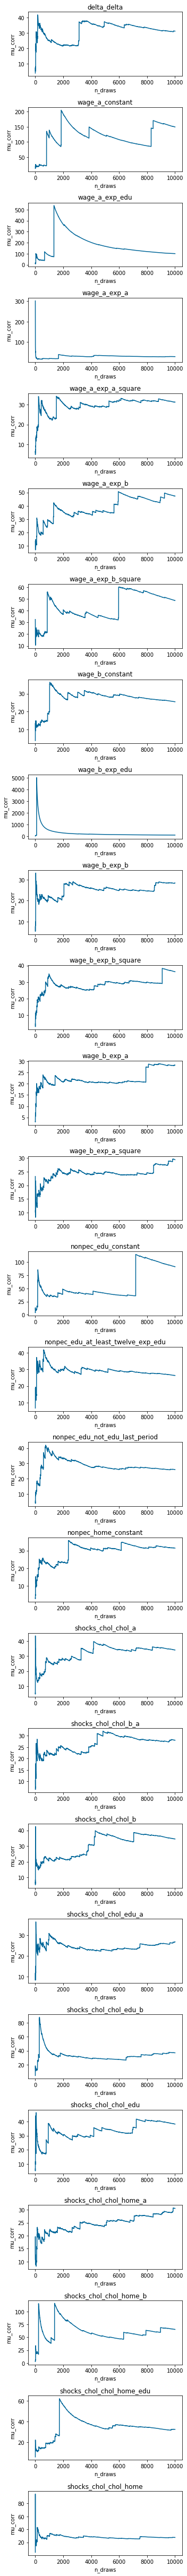

sigma_ind_cum


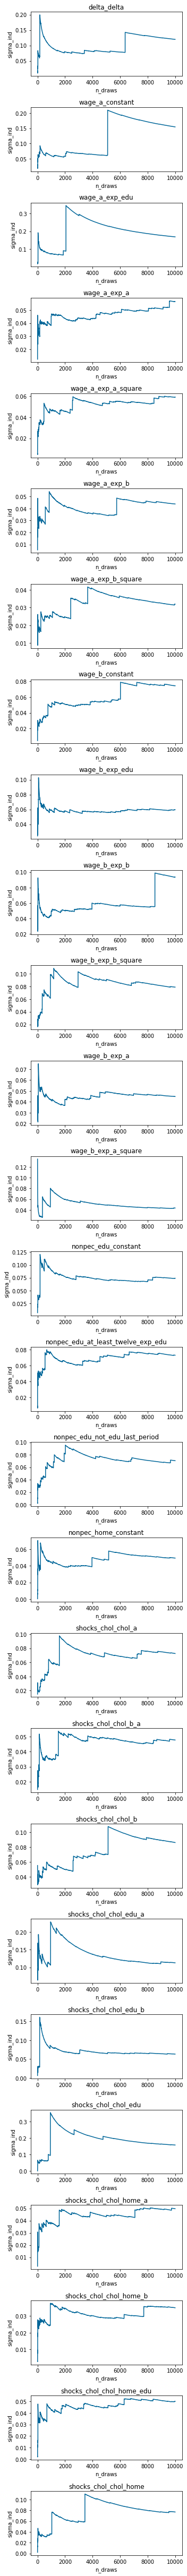

sigma_corr_cum


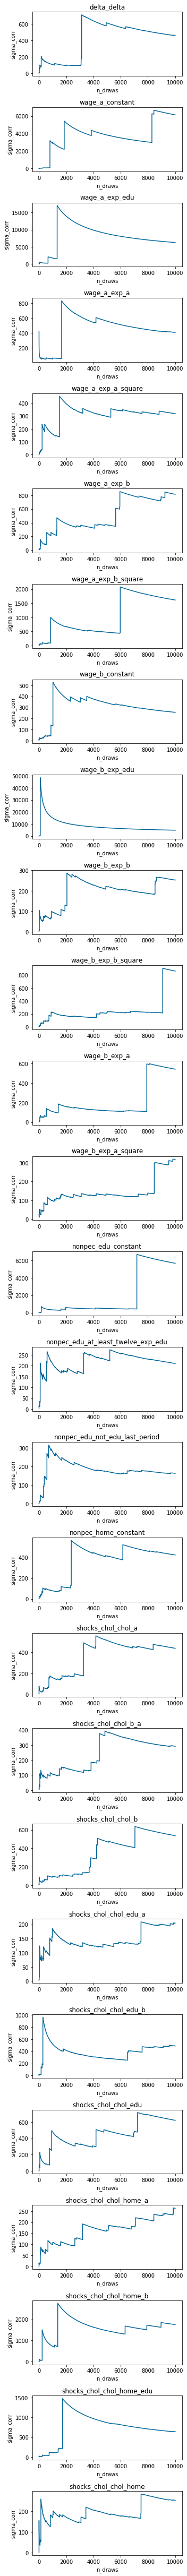

In [12]:
kinds = ["mu_ind_cum", "mu_corr_cum", "sigma_ind_cum", "sigma_corr_cum"]
for kind in kinds:
    print(kind)
    df = res[kind].T
    n_params = len(df)
    fig, axes = plt.subplots(nrows=n_params, figsize=(5, n_params * 2.5))
    for param, ax in zip(df.index, axes):
        sns.lineplot(x=df.columns, y=df.loc[param], color="#006699", ax=ax)
        ax.set_title("{}_{}".format(*param))
        ax.set_xlabel("n_draws")
        ax.set_ylabel(kind[:-4])
    
    # fig.suptitle(kind)
    fig.tight_layout()
    plt.show()
    plt.close()